In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv("/content/Mall_Customers.csv")

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
dataset.info()
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000         

In [10]:
df = dataset.copy()

In [11]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
import plotly.express as px
fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", color="Gender")
fig.show()

In [14]:
fig  = px.bar(df, x="Gender", color="Gender")
fig.show()

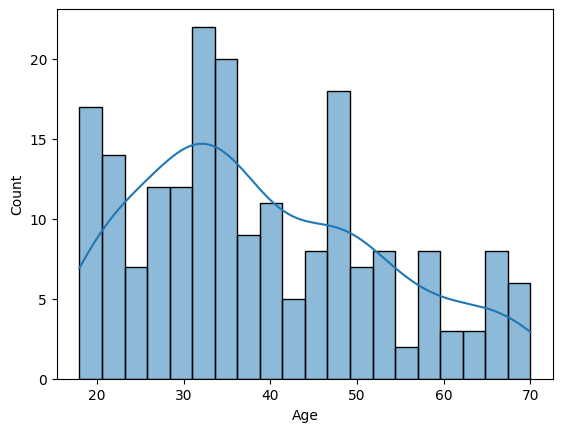

In [18]:
sns.histplot(df["Age"], bins=20, kde=True)
plt.show()

In [20]:
x = df[['Annual Income (k$)','Spending Score (1-100)']].values

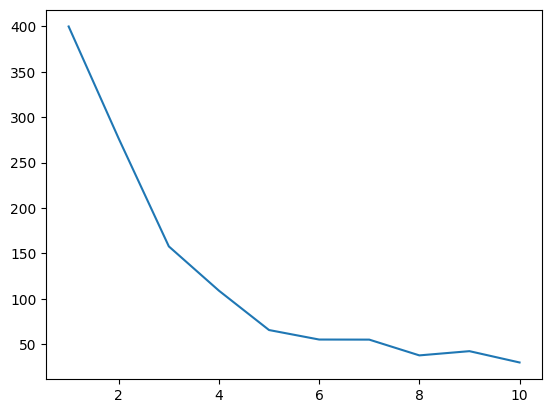

In [41]:
from sklearn.decomposition import PCA
x_scaled = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.show()

In [42]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
clusters = kmeans_model.fit_predict(x_pca)
df['Cluster'] = clusters


In [43]:
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster', title='Customer Segments (K-Means Clustering)', hover_data=['Age', 'Gender'])
fig.update_layout(xaxis_title='Annual Income (k$)', yaxis_title='Spending Score (1-100)')
fig.show()


> ### **Mini Review: Customer Clustering**
>
> *   **Goal:** Segment mall customers by income & spending.
> *   **Method:** Used K-Means clustering after scaling data.
> *   **Key Finding:** 5 distinct customer groups identified, visible in a scatter plot.
>
> *This operation successfully created actionable customer segments for targeted strategies.*